In [1]:
%matplotlib inline

import glob
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as ml
import numpy
import pandas
import random
import seaborn

matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['savefig.dpi'] = 300
seaborn.set_context({"figure.figsize": (12, 8)})

def calc_rho(species, basedir='../data'):
    """
    Calculate \rho, the proportion of iiLocus length to giLocus length, for a particular genome.
    """
    files = ['{}/{}/{}.iloci.tsv'.format(basedir, s, s) for s in species]
    data = pandas.concat([pandas.read_table(f) for f in files])
    giloci = data.loc[data.LocusClass.isin(['siLocus', 'ciLocus', 'niLocus'])]
    iiloci = data.loc[data.LocusClass.isin(['iiLocus'])]
    quant = list(giloci['Length'].quantile([0.05, 0.95]))
    giloci_q = giloci.loc[(giloci.Length >= quant[0]) & (giloci.Length <= quant[1])]
    quant = list(iiloci['Length'].quantile([0.05, 0.95]))
    iiloci_q = iiloci.loc[(iiloci.Length >= quant[0]) & (iiloci.Length <= quant[1])]
    rho = iiloci_q['Length'].mean() / giloci_q['Length'].mean()
    return rho

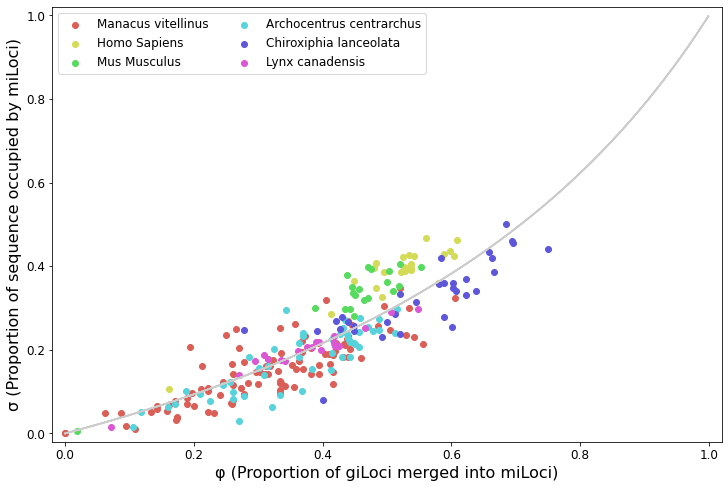

In [2]:
speciesnames = ['Manacus vitellinus','Homo Sapiens', 'Mus Musculus',
                'Archocentrus centrarchus','Chiroxiphia lanceolata','Lynx canadensis']
specieslist = ['Mvit','Hsap','Mmus','Acen','Clan','Lcan']

palette = seaborn.color_palette("hls", len(specieslist))
rho = calc_rho(specieslist, basedir='../data')

data = pandas.read_csv('../tables/phisigma-Mvit.tsv',sep='\t')
plots = list()
for i, species in enumerate(specieslist):
    specdata = data.loc[(data.Species == species)]
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i])
    plots.append(plot)
    x = [k / 1000 for k in range(1000)]
    y = [(k/(1+(1-k)*rho)) for k in x]
    _ = plt.plot(x, y, color='#cccccc')
_ = plt.xlim(-0.02, 1.02)
_ = plt.ylim(-0.02, 1.02)
_ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
_ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, speciesnames, scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=12)
plt.savefig('../figures/LSB20GB-SuppFig5d.png')
plt.show()